In [1]:
import numpy as np
import scipy.linalg as la
import networkx as nx
import nb_general as nb
import sympy as sy
import matplotlib.pyplot as plt

In [2]:
def create_K(G):
    A = nx.adjacency_matrix(G)
    np.block([[A,np.diag(list(dict(G.degree()).values()))-np.eye(len(G.degree))],[-np.eye(A.shape[1]),np.zeros((A.shape[1],len(G.degree())))]])

Try to make example where the cyclc lengths have a common divisor in the edge space. Thus it will not converge to a steady state distribution. Does this cause $K$ to not be diagonalizable?

In [2]:
G = nx.Graph([[1,2],[2,3],[2,4]])
A = nx.adjacency_matrix(G)
C, B = nb.to_edge_space(G,B=True)

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


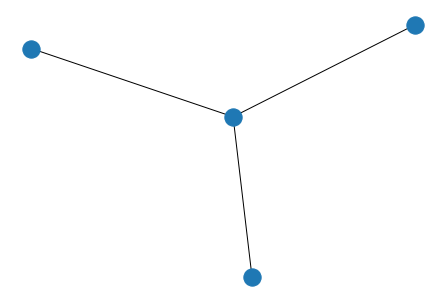

In [3]:
nx.draw(G)
plt.show()

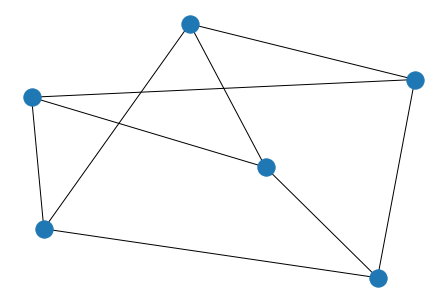

In [4]:
nx.draw(C)
plt.show()

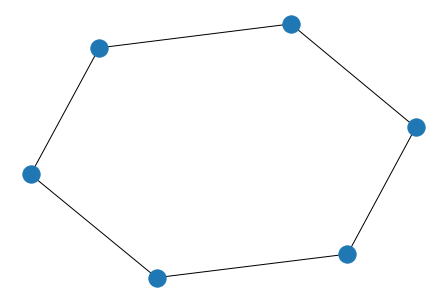

In [5]:
nx.draw(B)
plt.show()

In [6]:
A = nx.adjacency_matrix(B).todense()

In [7]:
np.linalg.matrix_power(A,100)[:,0] - np.linalg.matrix_power(A,100)[:,0]

matrix([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [8]:
K = create_K(G)

NameError: name 'create_K' is not defined

In [9]:
C4 = nx.cycle_graph(4)

In [10]:
C, B = nb.to_edge_space(C4,graph=False,B=True)

In [11]:
np.power(C,100)

array([[0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1., 1., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0.]])

In [12]:
np.power(B,100)

array([[0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]])

In [13]:
G = nx.Graph([[1,2],[1,5],[5,2],[4,2],[3,2],[3,5]])
C, B = nb.to_edge_space(G,graph = False, B=True)

In [14]:
np.power(B,100)

array([[0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.]])

In [15]:
A = nx.adjacency_matrix(G).todense()
np.power(A,100)

matrix([[0, 1, 1, 0, 0],
        [1, 0, 1, 1, 1],
        [1, 1, 0, 0, 1],
        [0, 1, 0, 0, 0],
        [0, 1, 1, 0, 0]])

In [16]:
K = np.block([[A,np.diag(list(dict(G.degree()).values()))-np.eye(len(G.degree))],[-np.eye(A.shape[1]),np.zeros((A.shape[1],len(G.degree())))]])

In [17]:
la.eig(K)[0].dtype

dtype('complex128')

In [18]:
G = nx.Graph([[1,2],[1,3],[1,4],[1,5],[1,6],[1,7],[2,3],[4,5],[6,7]])
A = nx.adjacency_matrix(G).todense()

In [19]:
C, B = nb.to_edge_space(G,graph = False,B=True)

In [20]:
la.eig(A)

(array([-2.+0.j,  3.+0.j,  1.+0.j, -1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j]),
 array([[-7.74596669e-01,  6.32455532e-01, -5.78344094e-17,
         -3.02380976e-16, -5.26522142e-17, -4.48428232e-18,
          2.52196867e-16],
        [ 2.58198890e-01,  3.16227766e-01,  5.77350269e-01,
         -7.07106781e-01, -1.23125264e-01, -6.75737378e-02,
          5.89753089e-01],
        [ 2.58198890e-01,  3.16227766e-01,  5.77350269e-01,
          7.07106781e-01,  1.23125264e-01, -6.75737378e-02,
         -5.89753089e-01],
        [ 2.58198890e-01,  3.16227766e-01, -2.88675135e-01,
          8.45931088e-17, -2.20190865e-01, -4.62776664e-01,
         -3.70463346e-01],
        [ 2.58198890e-01,  3.16227766e-01, -2.88675135e-01,
          8.45931088e-17,  2.20190865e-01, -4.62776664e-01,
          3.70463346e-01],
        [ 2.58198890e-01,  3.16227766e-01, -2.88675135e-01,
          8.45931088e-17,  6.60572594e-01,  5.30350402e-01,
          1.22262845e-01],
        [ 2.58198890e-01,  3.16227766e-01, -2

In [13]:
la.eig(la.inv(np.diag(B.sum(axis=1)))@B)

(array([-0.5       +0.8660254j , -0.5       -0.8660254j ,
         1.        +0.j        ,  0.29240177+0.50645473j,
         0.29240177-0.50645473j, -0.58480355+0.j        ,
        -0.58480355+0.j        ,  0.29240177+0.50645473j,
         0.29240177-0.50645473j, -0.29240177+0.50645473j,
        -0.29240177-0.50645473j, -0.29240177+0.50645473j,
        -0.29240177-0.50645473j, -0.29240177+0.50645473j,
        -0.29240177-0.50645473j,  0.58480355+0.j        ,
         0.58480355+0.j        ,  0.58480355+0.j        ]),
 array([[ 1.17851130e-01-2.04124145e-01j,  1.17851130e-01+2.04124145e-01j,
          2.35702260e-01+0.00000000e+00j, -4.77989427e-01+2.89421922e-16j,
         -4.77989427e-01-2.89421922e-16j, -4.77989427e-01+0.00000000e+00j,
          1.27632905e-01+0.00000000e+00j, -8.22184106e-02+4.09548873e-02j,
         -8.22184106e-02-4.09548873e-02j, -5.81222198e-01-2.12659915e-16j,
         -5.81222198e-01+2.12659915e-16j,  5.03971909e-02+5.99262602e-02j,
          5.03971909e-02-5

In [15]:
np.sqrt(3)/2

0.8660254037844386

In [88]:
K = np.block([[A,np.diag(list(dict(G.degree()).values()))-np.eye(len(G.degree))],[-np.eye(A.shape[1]),np.zeros((A.shape[1],len(G.degree())))]])

In [89]:
syK = sy.Matrix(K)

In [90]:
syK

Matrix([
[ 0.0,  1.0,  1.0,  1.0,  1.0,  1.0,  1.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[ 1.0,  0.0,  1.0,  0.0,  0.0,  0.0,  0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[ 1.0,  1.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
[ 1.0,  0.0,  0.0,  0.0,  1.0,  0.0,  0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
[ 1.0,  0.0,  0.0,  1.0,  0.0,  0.0,  0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
[ 1.0,  0.0,  0.0,  0.0,  0.0,  0.0,  1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
[ 1.0,  0.0,  0.0,  0.0,  0.0,  1.0,  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
[-1.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[ 0.0, -1.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[ 0.0,  0.0, -1.0,  0.0,  0.0,  0.0,  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[ 0.0,  0.0,  0.0, -1.0,  0.0,  0.0,  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[ 0.0,  0.0,  0.0,  0.0, -1.0,  0.0,  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0, -1.0,  0.0, 

In [100]:
la.eig(K)[0]

array([-0.85498797+1.48088261j, -0.85498797-1.48088261j,
        1.70997595+0.j        ,  1.        +0.j        ,
       -0.5       +0.8660254j , -0.5       -0.8660254j ,
       -0.5       +0.8660254j , -0.5       -0.8660254j ,
        0.5       +0.8660254j ,  0.5       -0.8660254j ,
        0.5       +0.8660254j ,  0.5       -0.8660254j ,
       -0.5       +0.8660254j , -0.5       -0.8660254j ])

In [98]:
vec1 = np.array([-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1])

In [99]:
K@vec1

matrix([[-1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.]])

In [126]:
k = np.eye(K.shape[0])-K
k1 = sy.Matrix(k).nullspace()
k2 = sy.Matrix(k**2)

In [130]:
for _ in range(500):
    print(_,sy.Matrix(k**_).nullspace())

0 []
1 [Matrix([
[-1.0],
[-1.0],
[-1.0],
[-1.0],
[-1.0],
[-1.0],
[-1.0],
[ 1.0],
[ 1.0],
[ 1.0],
[ 1.0],
[ 1.0],
[ 1.0],
[   1]])]
2 []
3 []
4 []
5 []
6 []
7 []
8 [Matrix([
[-0.999999999999919],
[-0.999999999999395],
[-0.999999999999415],
[  -1.0000000000005],
[ -1.00000000000049],
[-0.999999999999959],
[-0.999999999999959],
[ 0.999999999999978],
[ 0.999999999999443],
[ 0.999999999999435],
[  1.00000000000058],
[  1.00000000000057],
[               1.0],
[                 1]])]
9 []
10 []
11 [Matrix([
[ -1.00000000000079],
[-0.999999999990959],
[-0.999999999990539],
[                 0],
[                 0],
[   -1.000000000001],
[ -1.00000000000153],
[   1.0000000000006],
[ 0.999999999989477],
[ 0.999999999989358],
[                 0],
[                 0],
[               1.0],
[                 1]])]
12 []
13 []
14 []
15 []
16 []
17 []
18 []
19 [Matrix([
[ -1.83053518893888],
[  -1.3880877113558],
[ -1.13221607263623],
[-0.796808249415565],
[ -2.19463070459826],
[ -2.6036865633245

143 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[-1.0],
[   0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[-1.0],
[   0],
[   0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0]])]
144 [Matrix([
[   0],
[   0],
[   0],
[-1.0],
[   0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[-1.0],
[   0],
[   0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   0],
[   1],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   0],
[   0],
[   1],
[   0],
[   0]]), Matrix

159 [Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0]]), Matrix([
[    0.266048725712784],
[    0.538854025704385],
[    -1.32380952380953],
[    -2.20000000000001],
[     2.80000000000001],
[     1.51428571428572],
[    0.114285714285714],
[   -0.219642857142857],
[    -5.62857142857143],
[                  4.4],
[-5.58749518537391e-16],
[                    0],
[                 -1.0],
[                    1]])]
160 [Matrix([
[1.19634687014531e-16],
[  -0.999999999999999],
[                   0],
[                0.25],
[                   0],
[               -0.25],
[                   1],
[                   0],
[                   0],
[                   0],
[                   0],
[                   0],
[                   0],
[                   0]]), Matrix([
[0.519745727983181],
[-7.59150157877761],
[                0],
[             12.5],
[              3.0],
[             -6.5],
[                0],
[  

174 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[-1.0],
[   0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[-1.0],
[   0],
[   0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0]])]
175 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0]])]
176 [Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0]]), Matrix([
[   -0.207205197756388],
[    0.387833995401363],
[-1.50458763029933e-16],
[                 -2.0],
[    0.10752688

195 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0]])]
196 [Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0]])]
197 [Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0]])]
198 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[-0.0128314896928958],
[ 0.0279371587680465],
[                  0],
[ -0.158677685950413],
[-0.0528925619834711],
[ -0.165289256198347],
[   0.23801652892562],
[ 0.0231404958677686],
[  -0.76198347107438],
[ 0.0793388429752066],
[ -

212 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0]]), Matrix([
[-5.4437092244442e-17],
[                0.25],
[                   0],
[                0.75],
[                -0.5],
[                -0.5],
[                   0],
[                   0],
[                   0],
[                   0],
[                   0],
[                   0],
[                -1.0],
[                   1]])]
213 [Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0]])]
214 [Matrix([
[   0],
[   0]

232 [Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   0],
[   1],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   0],
[   0],
[   1],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1]])]
233 [Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0]])]
234 [Matrix([
[ -0.213225632003347],
[  0.169250864210835],
[  -2.14342629482072],
[ -0.184715682723651],
[  -1.14089098152843],
[   5.62235904865387],
[  -2.76397440540867],
[-0.0414704817095255],
[  0.663527707352409],
[  -2.70373053241579],
[  0.301

254 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0]]), Matrix([
[-0.410229837009495],
[ -1.56841424855177],
[                 0],
[ 0.943113772455088],
[  1.47305389221557],
[ -1.23053892215569],
[                 0],
[-0.221556886227544],
[  1.77245508982036],
[ -3.54491017964071],
[ -1.45508982035928],
[                 0],
[-0.317365269461076],
[                 1]])]
255 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]])]
256 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[ 

276 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0]]), Matrix([
[ -0.0145745044438605],
[   0.444149360374223],
[                   0],
[  -0.472222222222222],
[                   0],
[   0.527777777777778],
[  -0.527777777777778],
[-0.00347222222222222],
[  -0.666666666666667],
[ -0.0833333333333333],
[  -0.305555555555556],
[                   0],
[                   1],
[                   0]]), Matrix([
[0.0420780359996498],
[ 0.466843717108801],
[                 0],
[             -0.25],
[                 0],
[-0.916666666666667],
[ 0.916666666666667],
[          -0.03125],
[                 0],
[             -0.75],
[-0.416666666666667],
[                 0],
[                 0],
[                 1]])]
277 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0

291 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[ 9.75519952884122],
[ 21.3373336738758],
[                0],
[-23.1168465509146],
[  9.3796339746596],
[ 36.8568747067097],
[                0],
[-5.47735804786475],
[ 58.5706241201303],
[ 8.06006569685579],
[-29.4420459877986],
[ 34.9028625058651],
[-97.7250117315795],
[                1]])]
292 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0]]), Matrix([
[ 41.5747218066587],
[-120.922250907514],
[                0]

306 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[-1.0],
[   0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[-1.0],
[   0],
[   0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0]])]
307 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[7.03035056181396e-17],
[1.82701272333341e-16],
[                   0],
[                   0],
[                   0],


334 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[ 0.00702879189715686],
[ -0.0185856401674575],
[                   0],
[   -0.10155721056195],
[   0.501015572105619],
[  -0.331753554502369],
[                   0],
[-0.00914014895057548],
[  -0.018280297901151],
[                   0],
[  -0.725795531482735],
[  -0.314827352742044],
[                   1],
[                   0]]), Matrix([
[ 0.00702879189715704],
[ -0.0185856401674578],
[                   0],
[   -0.10155721056195],
[    0.50101557210562],
[  -0.331753554502369],
[                   0],
[-0.00914014895057549],
[  -0.018280297901151],
[                   0],
[   0.274204468517264],
[   -1

357 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]])]
358 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[0.0806768967951645],
[  1.19244329610144],
[                 0],
[               1.0],
[              -0.8],
[              -1.4],
[                 0],
[           0.06875],
[                 0],
[              -1.0],
[               0.7],
[                 1],
[                 0],
[                 0]]), Matrix([
[0.186600615190119],
[0.914992822468154],
[                0],
[              3.0],
[             -1.2],
[             -2.6],
[                0],
[          0.11875],
[ 

378 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]])]
379 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   -0.674894053326328],
[   -0.670207675509338],
[                    0],
[    -3.23809523809524],
[    -2.33333333333333],
[      2.9047619047619],
[                    0],
[    0.458333333333333],
[-1.42060761469147e-15],
[                    0],
[                  3.5],
[    -2.16666666666667],
[ 4.05887889911847e-16],
[                    1]])]
380 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([


400 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[-1.0],
[   0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[-1.0],
[   0],
[   0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   0],
[   1],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   0],
[   0],
[   1]])]
401 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix

409 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[-9.44813049013107e-17],
[                    0],
[                    0],
[                  3.0],
[                    0],
[                 -3.0],
[                    0],
[                    0],
[                 -1.0],
[                    1],
[                    0],
[                    0],
[                    0],
[                    0]]), Matrix([
[-0.0470307940692922],
[  0.443268288342674],
[                  0],
[ -0.982758620689655],
[                  0],
[  0.482758620689655],
[ -0.258620689655172],
[ 0.0571120689655172],
[  0.327586206896552],
[                  0],
[  -0.96551724137931],
[                  1],
[                  0],
[                  0]]), Matrix([
[   0.1187927263391],
[ 0.337376617571417],
[                 0],
[ 0.413793103448276],
[                 0],
[ 0.586206896551724],
[ -1.20689655172414],
[0.058189655172

417 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[ 0.0454847107178316],
[  -1.36814499276069],
[                  0],
[   -1.3206171789576],
[   2.83929858664399],
[  0.037662495444053],
[                  0],
[-0.0197373749645648],
[  -3.47211760417932],
[   2.00230834649496],
[    2.9821811849512],
[  -2.58125784635322],
[                  1],
[                  0]]), Matrix([
[-0.0245420979498866],
[   -1.7177644593947],
[                  0],
[ -0.863564572955899],
[   2.41909852994776],
[  0.193901105576479],
[                  0],
[-0.0298414530433726],
[  -2.76612805248451],
[   1.77317458389017],
[   2.10181022961973],
[  -2.39254039606366],
[                  0],
[                  1]])]
418 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0

433 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]])]
434 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[  0.0588893461424671],
[    1.84424080441382],
[                   0],
[  0.0927835051546394],
[   -1.56701030927835],
[  -0.206185567010309],
[                   0],
[-0.00128865979381443],
[                 4.5],
[   -5.39690721649484],
[                   1],
[                   0],
[                   0],
[                   0]]), Matrix([
[  0.0588893461424671],
[    1.84424080441382],
[                   0],
[  0.0927835051546394],
[   -1.56701030927835],
[  -0.206185567010309]

448 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0]])]
449 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[ 0.0139558369654998],
[-0.0343134321034803],
[                  0],
[  0.821052631578947],
[ -0.589473684210526],
[ -0.410526315789474],
[                  0],
[ 0.0763157894736842],
[   1.50526315789474],
[  -1.50526315789474],
[               -1.0],
[ -0.221052631578948],
[   0.85263157894737],
[                  1]])]
450 [Matrix([
[   0],
[-1.0],
[   1],
[   

465 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[-1.0],
[   0],
[ 1.0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1]])]
466 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0]]), Matrix([
[  -0.073544185141055],
[  -0.258053402273828],
[                   0],
[2.63295549548428e-16],
[                   0],


481 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]])]
482 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[-1.0],
[   0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[-1.0],
[   0],
[   0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[0.524682159978976],
[  13.010623026528],
[                0],
[             -6.0],
[             -6.0],
[                0],
[                0],
[            0.125],
[-2.66666666666667],
[              2.0],
[ 39.6666666666667],
[            -38.0],
[                1],
[                0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0

495 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[ 0.199938831167184],
[-0.357525653443992],
[                 0],
[ 0.637270550678372],
[  1.02394253790902],
[ -1.03870710295291],
[                 0],
[0.0841480446927374],
[ 0.162410215482841],
[ -0.26975259377494],
[-0.527533918595371],
[-0.149241819632881],
[ 0.835594573024741],
[                 1]])]
496 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   1],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]]), Matrix([
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[-1.0],
[   0],
[   1],
[   0]])]
497 [Matrix([
[   0],
[-1.0],
[   1],
[   0],
[   0],
[ 

In [108]:
k**2

matrix([[  2.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1., -10.,   1.,   1.,
           1.,   1.,   1.,   1.],
        [ -1.,   2.,  -1.,   1.,   1.,   1.,   1.,   5.,  -2.,   1.,
           0.,   0.,   0.,   0.],
        [ -1.,  -1.,   2.,   1.,   1.,   1.,   1.,   5.,   1.,  -2.,
           0.,   0.,   0.,   0.],
        [ -1.,   1.,   1.,   2.,  -1.,   1.,   1.,   5.,   0.,   0.,
          -2.,   1.,   0.,   0.],
        [ -1.,   1.,   1.,  -1.,   2.,   1.,   1.,   5.,   0.,   0.,
           1.,  -2.,   0.,   0.],
        [ -1.,   1.,   1.,   1.,   1.,   2.,  -1.,   5.,   0.,   0.,
           0.,   0.,  -2.,   1.],
        [ -1.,   1.,   1.,   1.,   1.,  -1.,   2.,   5.,   0.,   0.,
           0.,   0.,   1.,  -2.],
        [  2.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -4.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [ -1.,   2.,  -1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [ -1.,  -1.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
    

Compare two joined cycles and three

In [16]:
G2 = nx.Graph([[1,2],[1,3],[1,4],[1,5],[2,3],[4,5]])
G3 = nx.Graph([[1,2],[1,3],[1,4],[1,5],[1,6],[1,7],[2,3],[4,5],[6,7]])
A2 = nx.adjacency_matrix(G2).todense()
A3 = nx.adjacency_matrix(G3).todense()
C2, B2 = nb.to_edge_space(G2,graph=False, B=True)
C3, B3 = nb.to_edge_space(G3,graph=False, B=True)
K2 = np.block([[A2,np.diag(list(dict(G2.degree()).values()))-np.eye(len(G2.degree()))],[-np.eye(len(G2.degree())),np.zeros((len(G2.degree()),len(G2.degree())))]])
K3 = np.block([[A3,np.diag(list(dict(G3.degree()).values()))-np.eye(len(G3.degree()))],[-np.eye(len(G3.degree())),np.zeros((len(G3.degree()),len(G3.degree())))]])


In [17]:
# Check using power method
la.eig(la.inv(np.diag(B2.sum(axis=1)))@B2)

(array([-0.5       +0.8660254j , -0.5       -0.8660254j ,
        -0.69336127+0.j        ,  0.34668064+0.60046848j,
         0.34668064-0.60046848j,  1.        +0.j        ,
        -0.34668064+0.60046848j, -0.34668064-0.60046848j,
        -0.34668064+0.60046848j, -0.34668064-0.60046848j,
         0.69336127+0.j        ,  0.69336127+0.j        ]),
 array([[ 1.44337567e-01+2.50000000e-01j,  1.44337567e-01-2.50000000e-01j,
         -3.82150628e-01+0.00000000e+00j,  3.82150628e-01-2.75297700e-16j,
          3.82150628e-01+2.75297700e-16j, -2.88675135e-01+0.00000000e+00j,
          5.34706533e-01+1.38476058e-16j,  5.34706533e-01-1.38476058e-16j,
          1.49808131e-02-8.70383190e-02j,  1.49808131e-02+8.70383190e-02j,
         -5.40442602e-01+0.00000000e+00j, -5.00351526e-02+0.00000000e+00j],
        [ 1.44337567e-01+2.50000000e-01j,  1.44337567e-01-2.50000000e-01j,
         -3.82150628e-01+0.00000000e+00j,  3.82150628e-01+5.88561987e-16j,
          3.82150628e-01-5.88561987e-16j, -2.8867